In [23]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else [])
df["job_skills"] = df["job_skills"].apply(lambda skills: [skill.title() for skill in skills] if len(skills) > 0 else skills)

In [24]:
df_da_us = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

In [25]:
df_da_us["job_posted_month_no"] =  df_da_us["job_posted_date"].dt.month

In [26]:
df_da_us_explode = df_da_us.explode("job_skills")

In [28]:
df_da_us_pivot = df_da_us_explode.pivot_table(
    index="job_posted_month_no", columns="job_skills", aggfunc="size", fill_value=0
)

df_da_us_pivot.loc["Total"] = df_da_us_pivot.sum()

df_da_us_pivot = df_da_us_pivot[df_da_us_pivot.loc["Total"].sort_values(ascending=False).index]

df_da_us_pivot.drop("Total", inplace=True)

df_da_us_pivot

job_skills,Sql,Excel,Tableau,Python,Sas,R,Power Bi,Word,Powerpoint,Oracle,...,Google Chat,Openstack,Theano,Asp.Net Core,Qt,Couchdb,Capacitor,Codecommit,Chainer,Msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='job_posted_month_no'>

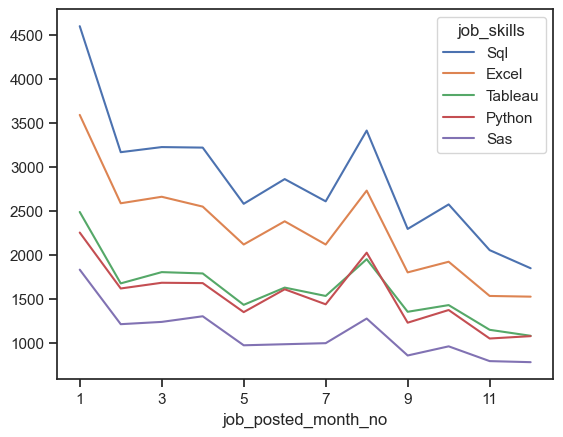

In [29]:
df_da_us_pivot = df_da_us_pivot.iloc[:, :5]

df_da_us_pivot.plot()

In [30]:
da_totals = df_da_us.groupby("job_posted_month_no").size()

In [31]:
df_da_us_percent = df_da_us_pivot.div(da_totals/100, axis=0)

In [32]:
df_da_us_percent = df_da_us_percent.reset_index()
df_da_us_percent["job_posted_month"] = df_da_us_percent["job_posted_month_no"].apply(lambda x: pd.to_datetime(x, format="%m").strftime("%b"))
df_da_us_percent = df_da_us_percent.set_index("job_posted_month")
df_da_us_percent = df_da_us_percent.drop(columns="job_posted_month_no")

df_da_us_percent

job_skills,Sql,Excel,Tableau,Python,Sas
job_posted_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


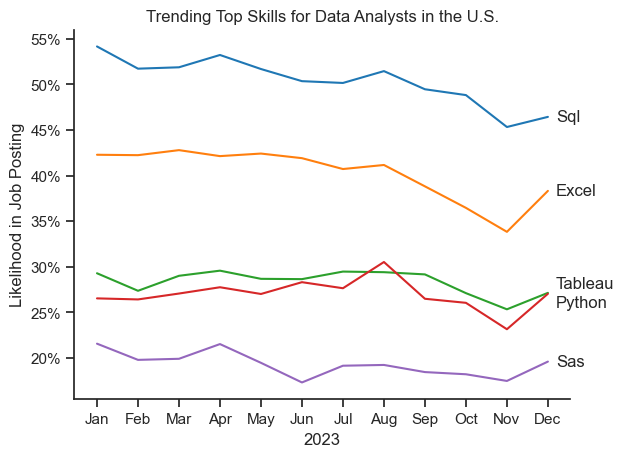

In [36]:
sns.lineplot(data=df_da_us_percent, dashes=False, palette="tab10")
sns.set_theme(style="ticks")
sns.despine()

plt.title("Trending Top Skills for Data Analysts in the U.S.")
plt.ylabel("Likelihood in Job Posting")
plt.xlabel("2023")
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

offsets = {"Tableau": 1, "Python": -1}
x_label = df_da_us_percent.shape[0] - 0.8

for col in df_da_us_percent.columns:
  y = df_da_us_percent.iloc[-1][col]
  dy = offsets.get(col, 0)
  plt.text(x_label, y + dy, col, ha="left", va="center")